In [9]:
# Импорт всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [10]:
# Загрузка и подготовка данных

df = pd.read_csv('processed_titanic.csv')
print(f"Размер датасета: {df.shape}")
print(df.head())

# Проверка данных
print(f"\nИнформация о данных:")
print(df.info())

# Подготовка данных для классификации
X = df.drop(['Survived'], axis=1)
y = df['Survived']

print(f"\nРаспределение классов:")
print(y.value_counts())
print(f"Доля выживших: {y.mean():.3f}")

Размер датасета: (891, 18)
   PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0            1         0       3 -0.497793  0.432793 -0.473674 -0.502445   
1            2         1       1  0.715048  0.432793 -0.473674  0.786845   
2            3         1       3 -0.194583 -0.474545 -0.473674 -0.488854   
3            4         1       1  0.487640  0.432793 -0.473674  0.420730   
4            5         0       3  0.487640 -0.474545 -0.473674 -0.486337   

   Sex_male  Embarked_Q  Embarked_S  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0      True       False        True    False    False    False    False   
1     False       False       False    False     True    False    False   
2     False       False        True    False    False    False    False   
3     False       False        True    False     True    False    False   
4      True       False        True    False    False    False    False   

   Cabin_F  Cabin_G  Cabin_T  Cabin_U  
0    False    False    Fa

In [11]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Размеры выборок:")
print(f"Обучающая: {X_train.shape}")
print(f"Тестовая: {X_test.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts())

Размеры выборок:
Обучающая: (623, 17)
Тестовая: (268, 17)

Распределение классов в обучающей выборке:
Survived
0    384
1    239
Name: count, dtype: int64



ЗАДАНИЕ 2: СЛУЧАЙНЫЙ ЛЕС С OOB ОЦЕНКОЙ
ОЦЕНКА СЛУЧАЙНОГО ЛЕСА:
Accuracy на тестовой выборке: 0.8358
OOB Accuracy: 0.8074
OOB Error: 0.1926


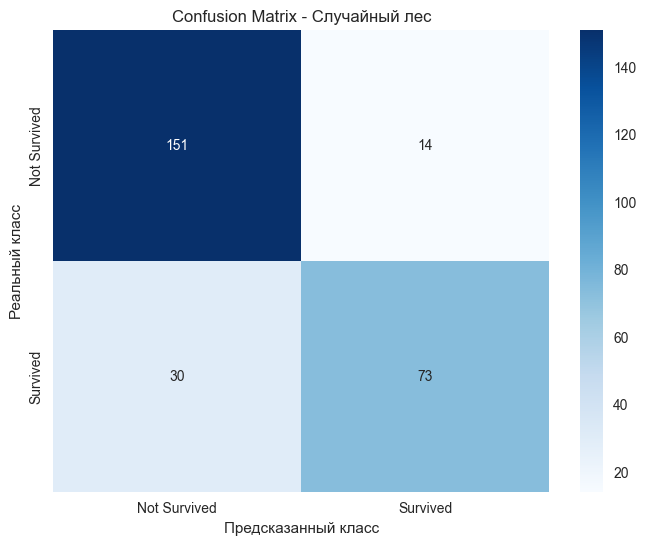


ОТЧЕТ КЛАССИФИКАЦИИ - СЛУЧАЙНЫЙ ЛЕС
              precision    recall  f1-score   support

Not Survived       0.83      0.92      0.87       165
    Survived       0.84      0.71      0.77       103

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268



In [12]:
# ЗАДАНИЕ 2: Случайный лес с оценкой через OOB
print("\n" + "=" * 60)
print("ЗАДАНИЕ 2: СЛУЧАЙНЫЙ ЛЕС С OOB ОЦЕНКОЙ")
print("=" * 60)

# Создание и обучение случайного леса с OOB оценкой
rf_model = RandomForestClassifier(
    n_estimators=100,        # Количество деревьев
    max_depth=5,             # Максимальная глубина деревьев
    min_samples_split=20,    # Минимальное количество samples для разделения
    min_samples_leaf=10,     # Минимальное количество samples в листе
    oob_score=True,          # Включение OOB оценки
    random_state=42,
    n_jobs=-1               # Использование всех ядер процессора
)

rf_model.fit(X_train, y_train)

# Предсказания
y_rf_pred = rf_model.predict(X_test)
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Оценка модели
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_oob_accuracy = rf_model.oob_score_

print("ОЦЕНКА СЛУЧАЙНОГО ЛЕСА:")
print(f"Accuracy на тестовой выборке: {rf_accuracy:.4f}")
print(f"OOB Accuracy: {rf_oob_accuracy:.4f}")
print(f"OOB Error: {1 - rf_oob_accuracy:.4f}")

# Матрица ошибок
cm_rf = confusion_matrix(y_test, y_rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Случайный лес')
plt.ylabel('Реальный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Полный отчет классификации
print("\nОТЧЕТ КЛАССИФИКАЦИИ - СЛУЧАЙНЫЙ ЛЕС")
print(classification_report(y_test, y_rf_pred, 
                          target_names=['Not Survived', 'Survived']))

In [13]:
# ЗАДАНИЕ 3: AdaBoost и Градиентный бустинг
print("\n" + "=" * 60)
print("ЗАДАНИЕ 3: ADABOOST И ГРАДИЕНТНЫЙ БУСТИНГ")
print("=" * 60)

# 3.1 AdaBoost классификатор
print("\n--- AdaBoost Classifier ---")

# Слабая модель для AdaBoost (дерево с глубиной 1 - "пень")
base_estimator_ada = DecisionTreeClassifier(max_depth=1, random_state=42)

ada_model = AdaBoostClassifier(
    estimator=base_estimator_ada,
    n_estimators=50,        # Количество слабых моделей
    learning_rate=1.0,      # Скорость обучения
    random_state=42
)

ada_model.fit(X_train, y_train)
y_ada_pred = ada_model.predict(X_test)
y_ada_proba = ada_model.predict_proba(X_test)[:, 1]

ada_accuracy = accuracy_score(y_test, y_ada_pred)

print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")
print(f"Количество слабых моделей: {len(ada_model.estimators_)}")

# 3.2 Градиентный бустинг классификатор
print("\n--- Gradient Boosting Classifier ---")

gb_model = GradientBoostingClassifier(
    n_estimators=100,       # Количество деревьев
    max_depth=3,            # Максимальная глубина деревьев
    learning_rate=0.1,      # Скорость обучения
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)
y_gb_proba = gb_model.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, y_gb_pred)

print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

# Сравнение точности моделей
print("\nСРАВНЕНИЕ ТОЧНОСТИ МОДЕЛЕЙ:")
print(f"Случайный лес: {rf_accuracy:.4f}")
print(f"AdaBoost: {ada_accuracy:.4f}")
print(f"Градиентный бустинг: {gb_accuracy:.4f}")


ЗАДАНИЕ 3: ADABOOST И ГРАДИЕНТНЫЙ БУСТИНГ

--- AdaBoost Classifier ---
AdaBoost Accuracy: 0.8060
Количество слабых моделей: 50

--- Gradient Boosting Classifier ---
Gradient Boosting Accuracy: 0.8060

СРАВНЕНИЕ ТОЧНОСТИ МОДЕЛЕЙ:
Случайный лес: 0.8358
AdaBoost: 0.8060
Градиентный бустинг: 0.8060



ЗАДАНИЕ 4: ROC-КРИВЫЕ И ОЦЕНКА МОДЕЛЕЙ
ROC-AUC SCORES:
Случайный лес: 0.8529
AdaBoost: 0.8475
Градиентный бустинг: 0.8511


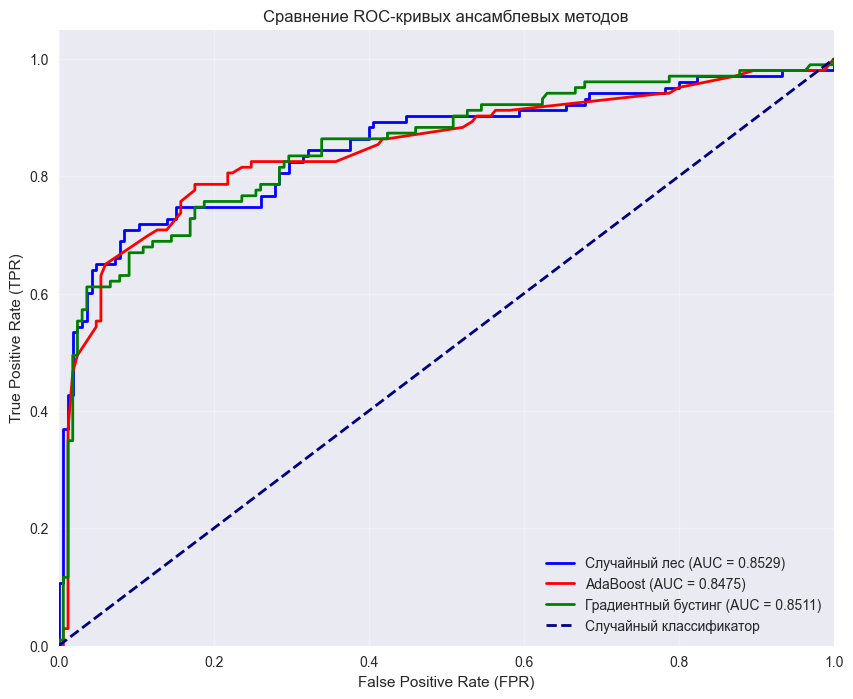

In [14]:
# ЗАДАНИЕ 4: ROC-кривые и оценка моделей
print("\n" + "=" * 60)
print("ЗАДАНИЕ 4: ROC-КРИВЫЕ И ОЦЕНКА МОДЕЛЕЙ")
print("=" * 60)

# Построение ROC-кривых для всех моделей
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_ada_proba)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_gb_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("ROC-AUC SCORES:")
print(f"Случайный лес: {roc_auc_rf:.4f}")
print(f"AdaBoost: {roc_auc_ada:.4f}")
print(f"Градиентный бустинг: {roc_auc_gb:.4f}")

# Визуализация ROC-кривых
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, 
         label=f'Случайный лес (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_ada, tpr_ada, color='red', lw=2, 
         label=f'AdaBoost (AUC = {roc_auc_ada:.4f})')
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, 
         label=f'Градиентный бустинг (AUC = {roc_auc_gb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Случайный классификатор')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Сравнение ROC-кривых ансамблевых методов')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


ДЕТАЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ
СРАВНИТЕЛЬНАЯ ТАБЛИЦА:
                 Метод  Accuracy   ROC-AUC  OOB_Score
0        Случайный лес  0.835821  0.852898   0.807384
1             AdaBoost  0.805970  0.847485        NaN
2  Градиентный бустинг  0.805970  0.851133        NaN


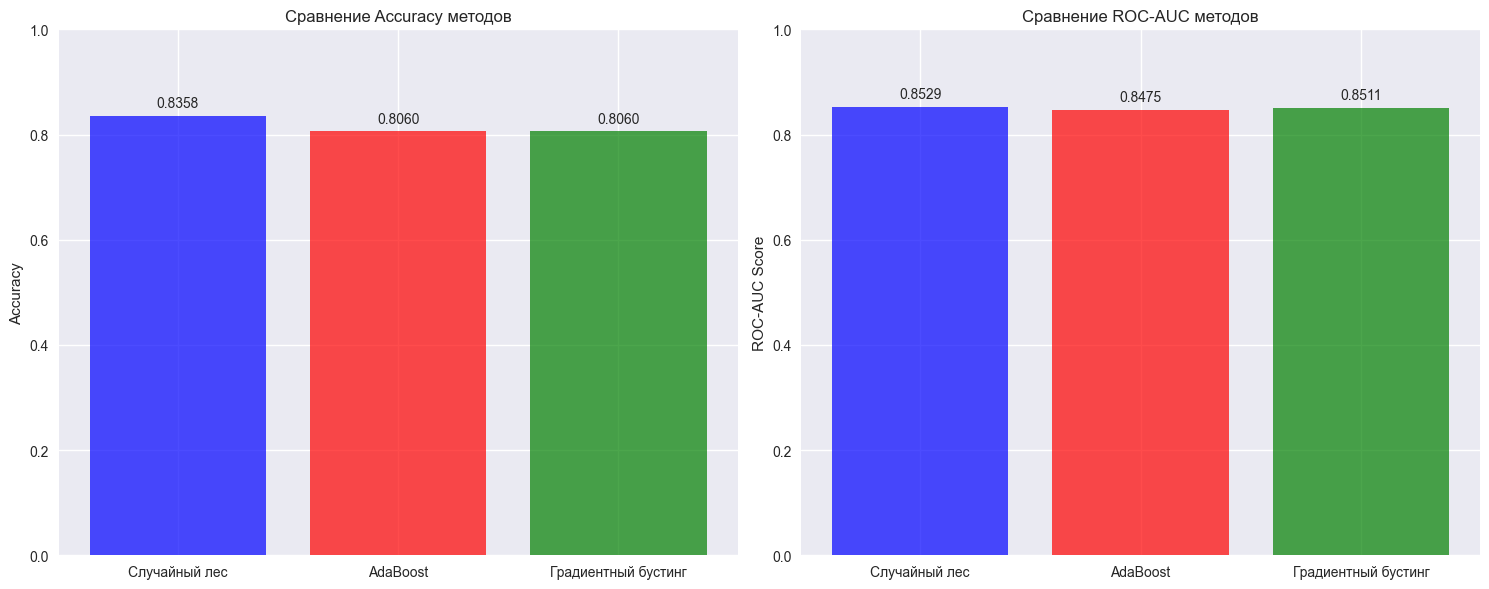

In [15]:
# Детальный анализ производительности моделей
print("\n" + "=" * 60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ")
print("=" * 60)

# Создание сравнительной таблицы
comparison_df = pd.DataFrame({
    'Метод': ['Случайный лес', 'AdaBoost', 'Градиентный бустинг'],
    'Accuracy': [rf_accuracy, ada_accuracy, gb_accuracy],
    'ROC-AUC': [roc_auc_rf, roc_auc_ada, roc_auc_gb],
    'OOB_Score': [rf_oob_accuracy, np.nan, np.nan]
})

print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА:")
print(comparison_df)

# Визуализация сравнения метрик
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy сравнение
methods = comparison_df['Метод']
accuracies = comparison_df['Accuracy']

bars = axes[0].bar(methods, accuracies, color=['blue', 'red', 'green'], alpha=0.7)
axes[0].set_title('Сравнение Accuracy методов')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Добавление значений на столбцы
for bar, accuracy in zip(bars, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{accuracy:.4f}', ha='center', va='bottom')

# ROC-AUC сравнение
auc_scores = comparison_df['ROC-AUC']

bars = axes[1].bar(methods, auc_scores, color=['blue', 'red', 'green'], alpha=0.7)
axes[1].set_title('Сравнение ROC-AUC методов')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].set_ylim(0, 1)

# Добавление значений на столбцы
for bar, auc_score in zip(bars, auc_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{auc_score:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


АНАЛИЗ ОБУЧЕНИЯ ГРАДИЕНТНОГО БУСТИНГА:


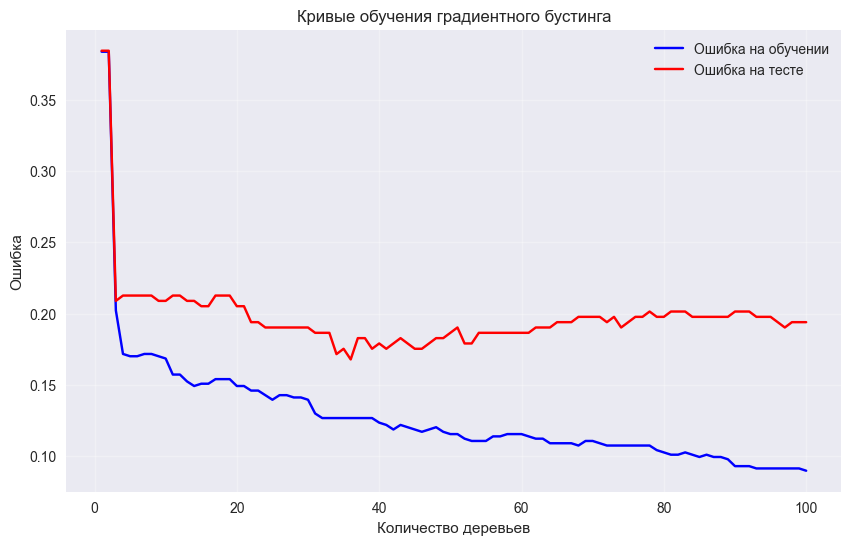

Минимальная ошибка на тесте: 0.1679
При количестве деревьев: 36


In [16]:
# Анализ обучения градиентного бустинга
print("\nАНАЛИЗ ОБУЧЕНИЯ ГРАДИЕНТНОГО БУСТИНГА:")

# Функция для отслеживания ошибок во время обучения
def monitor_errors(model, X_train, X_test, y_train, y_test):
    train_errors = []
    test_errors = []
    
    # Получаем поэтапные предсказания
    for i, y_pred in enumerate(model.staged_predict(X_train)):
        train_errors.append(1 - accuracy_score(y_train, y_pred))
    
    for i, y_pred in enumerate(model.staged_predict(X_test)):
        test_errors.append(1 - accuracy_score(y_test, y_pred))
    
    return train_errors, test_errors

# Применяем для градиентного бустинга
train_errors, test_errors = monitor_errors(gb_model, X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, 'b-', label='Ошибка на обучении')
plt.plot(range(1, len(test_errors) + 1), test_errors, 'r-', label='Ошибка на тесте')
plt.xlabel('Количество деревьев')
plt.ylabel('Ошибка')
plt.title('Кривые обучения градиентного бустинга')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Минимальная ошибка на тесте: {min(test_errors):.4f}")
print(f"При количестве деревьев: {np.argmin(test_errors) + 1}")